In [1]:
# Load in all dependencies and helper functions from the main folder
import sys
sys.path.append('..//')
from utils import *

Using TensorFlow backend.


GPU availbility: ['/job:localhost/replica:0/task:0/device:GPU:0']


In [2]:
sns.set_style("white")

In [3]:
FIG_OUTPUT_PATH = EXPORT_PATH + "03-check-facial-landmarks-from-openface\\"

In [4]:
df = pd.read_csv(MST_PATH + 'all_img_facial_lankmarks.csv')
df.shape

(642719, 153)

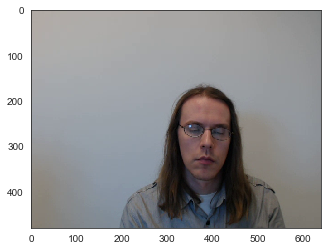

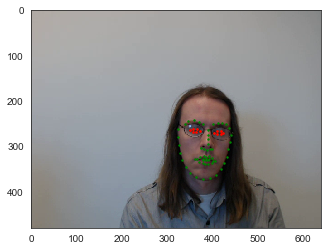

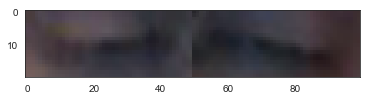

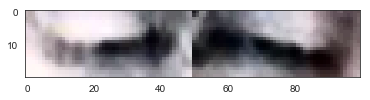

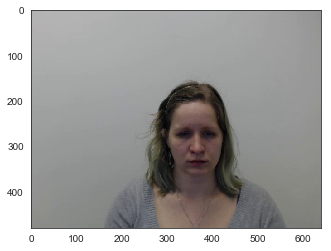

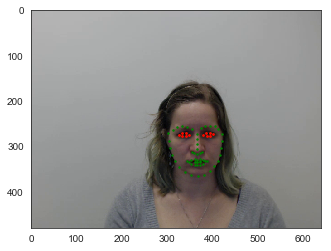

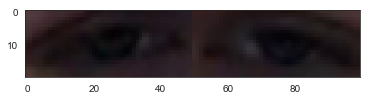

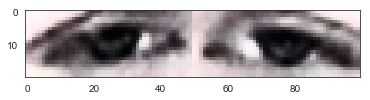

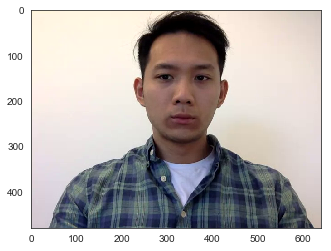

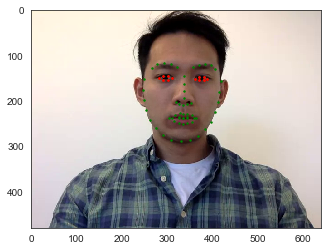

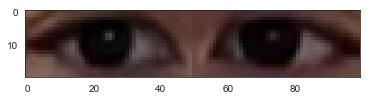

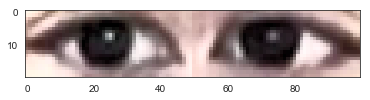

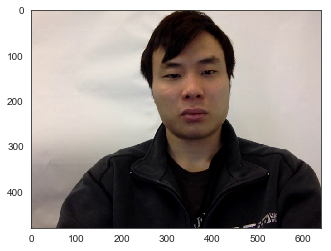

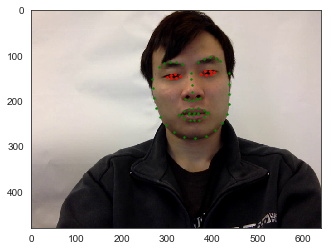

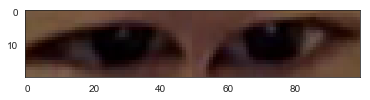

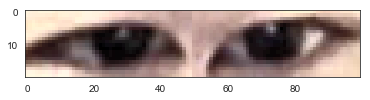

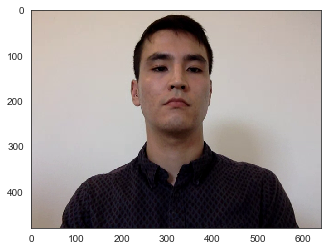

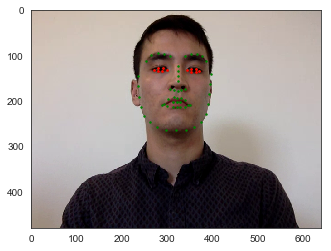

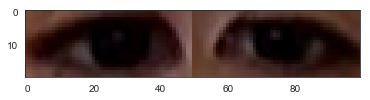

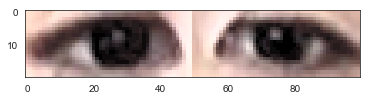

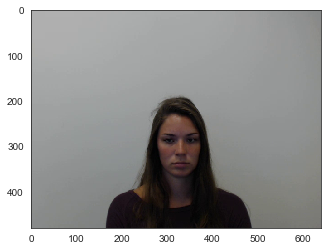

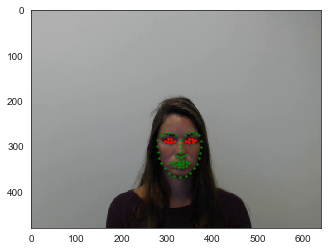

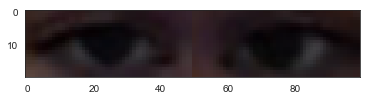

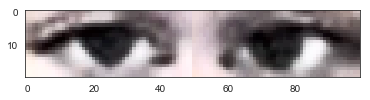

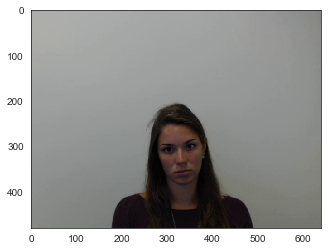

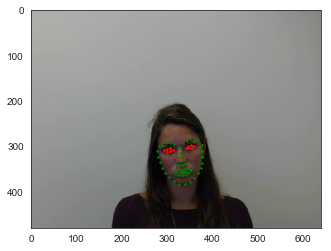

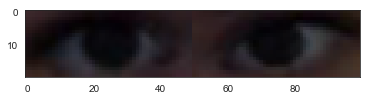

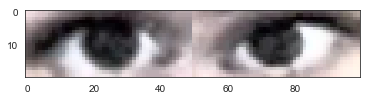

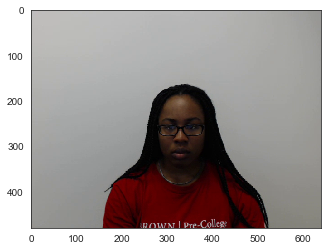

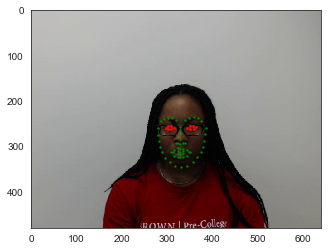

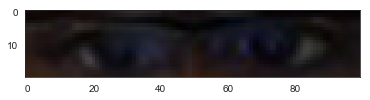

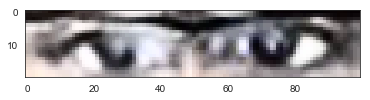

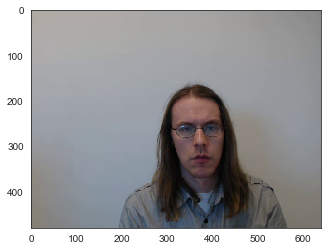

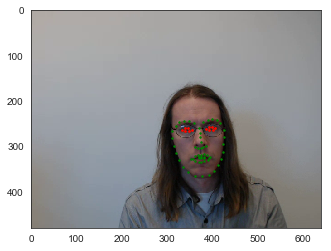

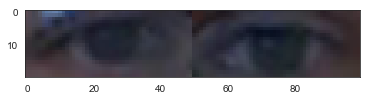

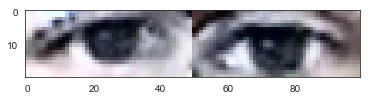

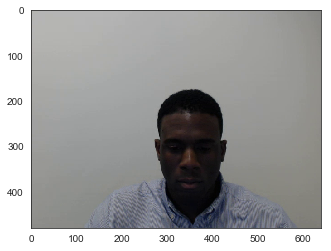

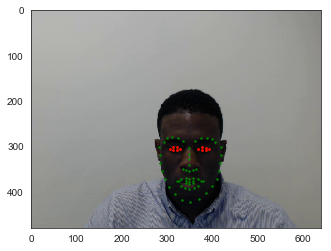

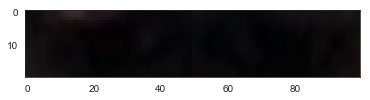

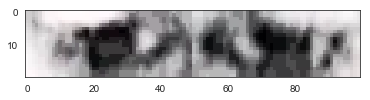

In [5]:
y_resize = int(20)
x_resize = int(y_resize * 2.5)
for idx in np.random.choice(df.index, 10, replace = False):
    # Original Img
    img = Image.open(df['frameImageFile'][idx])
    plt.imshow(img)
    plt.savefig(FIG_OUTPUT_PATH + str(idx), fmt = 'png', dpi = 300)
    plt.show()
    
    # Marked face
    xs,ys = get_facial_landmarks(df, idx)
    plt.scatter(xs, ys, s = 2, c = 'green')
    eyexs,eyeys = get_eye_landmarks(df, idx)
    plt.imshow(img)
    plt.scatter(eyexs,eyeys, s = 3, c = 'red')
    plt.savefig(FIG_OUTPUT_PATH + str(idx) + "_marked", fmt = 'png', dpi = 300)
    plt.show()
    
    # Cropped eye img
    left_crop, right_crop = simple_eye_box(df, idx)
    stitch = crop_resize_stitch(img, left_crop, right_crop, x_resize, y_resize)
    plt.imshow(stitch)
    plt.savefig(FIG_OUTPUT_PATH + str(idx) + "_stitch", fmt = 'png', dpi = 300)
    plt.show()
    
    # Histogram equalized eye image
    img = histogram_equalize(stitch)
    plt.imshow(img)
    plt.savefig(FIG_OUTPUT_PATH + str(idx) + "_hist_eq", fmt = 'png', dpi = 300)
    plt.show()